# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, RocCurveDisplay, plot_confusion_matrix


%matplotlib inline

# Load Dataset

In [4]:
from google.colab import files
data = files.upload()

Saving heart.csv to heart.csv


In [5]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Dictionary
- age in years
- sex (1 = male , 0 = femal)
- cp(chest pain type):
    - 1: typical angina
    - 2: atypical angina
    - 3: non-anginal pain
    - 4: asymptomatic
- trestbps(resting blood pressure) in mm Hg on admission to the hospital)
- chol(serum cholestoral) in mg/dl
- fbs(fasting blood sugar) > 120 mg/dl (1 = true , 0 = false)
- restecg(resting electrocardiographic results):
     - 0: normal
     - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach(maximum heart rate achieved)
- exang(exercise induced angina) (1 = yes , 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope(the slope of the peak exercise ST segment):
    - 1: upsloping
    - 2: flat
    - 3: downsloping
- ca number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target 0 = No Diesase , 1 = Diesase

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data Analysis and Visualization

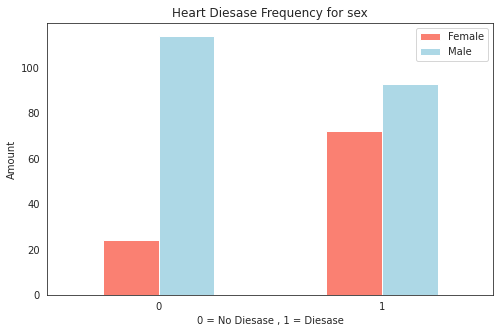

In [9]:
pd.crosstab(df.target, df.sex).plot(figsize=(8,5), kind='bar', color=['salmon','lightblue'])
plt.title("Heart Diesase Frequency for sex")
plt.xlabel("0 = No Diesase , 1 = Diesase")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()

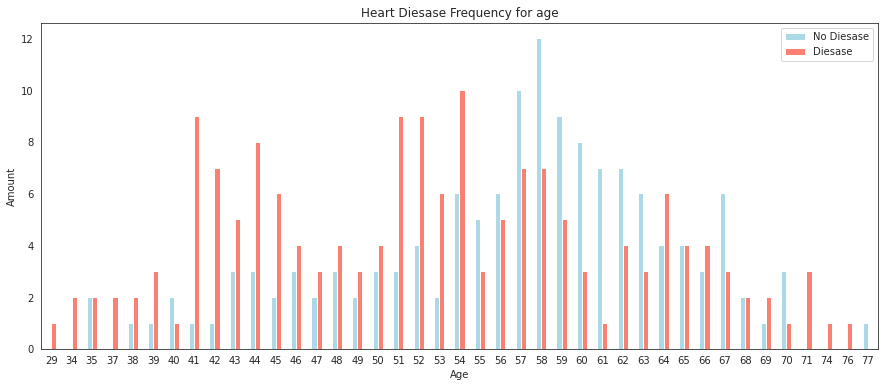

In [10]:
pd.crosstab(df.age, df.target).plot(figsize=(15,6), kind='bar', color=['lightblue', 'salmon'])
plt.title("Heart Diesase Frequency for age")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

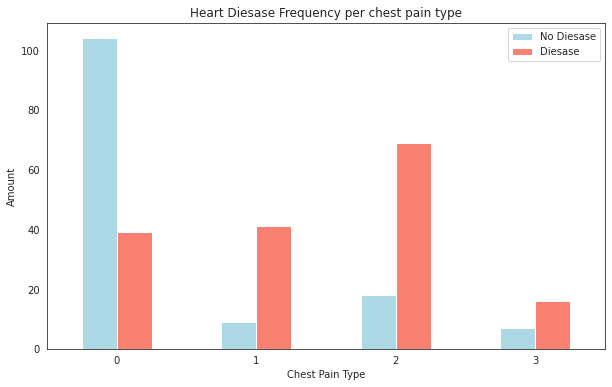

In [11]:
pd.crosstab(df.cp, df.target).plot(figsize=(10,6), kind='bar', color=['lightblue', 'salmon'])
plt.title("Heart Diesase Frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

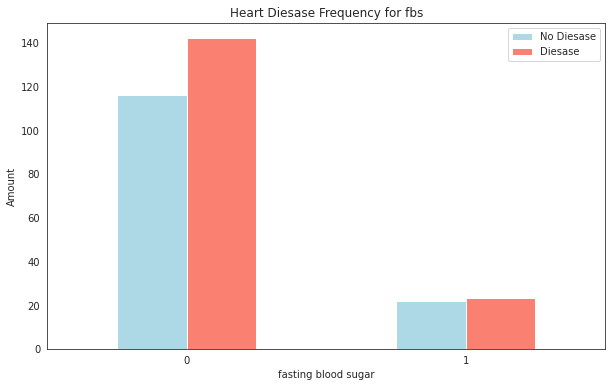

In [12]:
pd.crosstab(df.fbs, df.target).plot(figsize=(10,6), kind='bar', color=['lightblue', 'salmon'])
plt.title("Heart Diesase Frequency for fbs")
plt.xlabel("fasting blood sugar") #(1 = true , 0 = false)
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

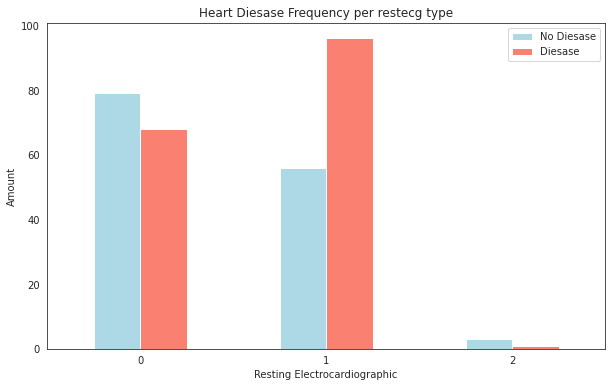

In [13]:
pd.crosstab(df.restecg, df.target).plot(figsize=(10,6), kind='bar', color=['lightblue', 'salmon'])
plt.title("Heart Diesase Frequency per restecg type")
plt.xlabel("Resting Electrocardiographic")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

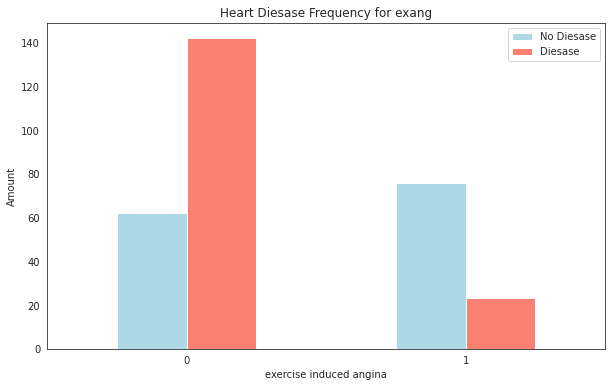

In [14]:
pd.crosstab(df.exang, df.target).plot(figsize=(10,6), kind='bar', color=['lightblue', 'salmon'])
plt.title("Heart Diesase Frequency for exang")
plt.xlabel("exercise induced angina")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

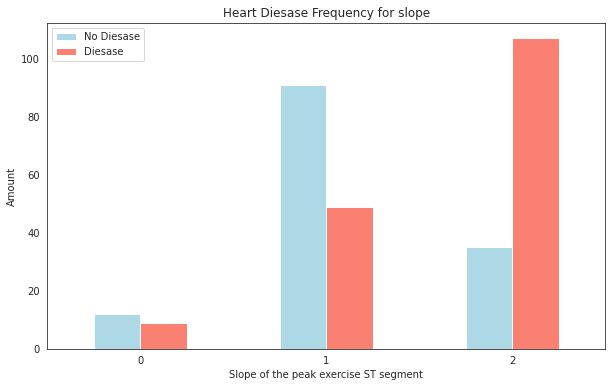

In [15]:
pd.crosstab(df.slope, df.target).plot(figsize=(10,6), kind='bar', color=['lightblue', 'salmon'])
plt.title("Heart Diesase Frequency for slope")
plt.xlabel("Slope of the peak exercise ST segment")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

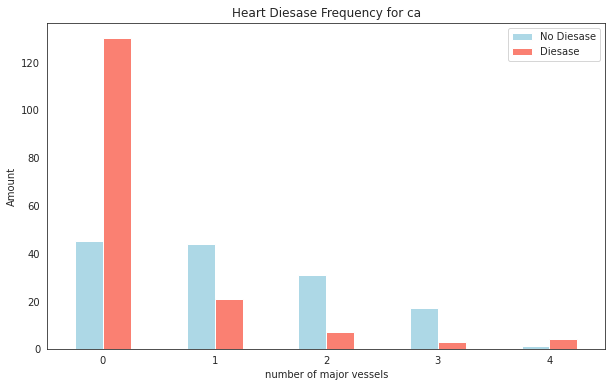

In [16]:
pd.crosstab(df.ca, df.target).plot(figsize=(10,6), kind='bar', color=['lightblue', 'salmon'])
plt.title("Heart Diesase Frequency for ca")
plt.xlabel("number of major vessels")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

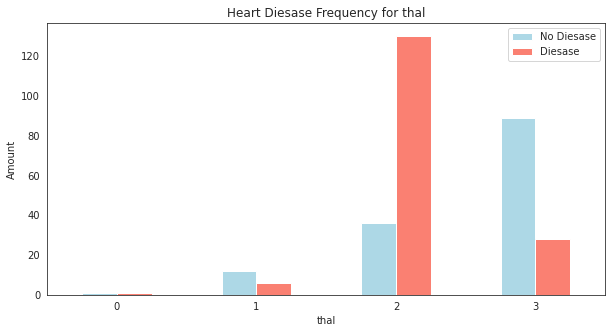

In [17]:
pd.crosstab(df.thal, df.target).plot(figsize=(10,5), kind='bar', color=['lightblue', 'salmon'])
plt.title("Heart Diesase Frequency for thal")
plt.xlabel("thal")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

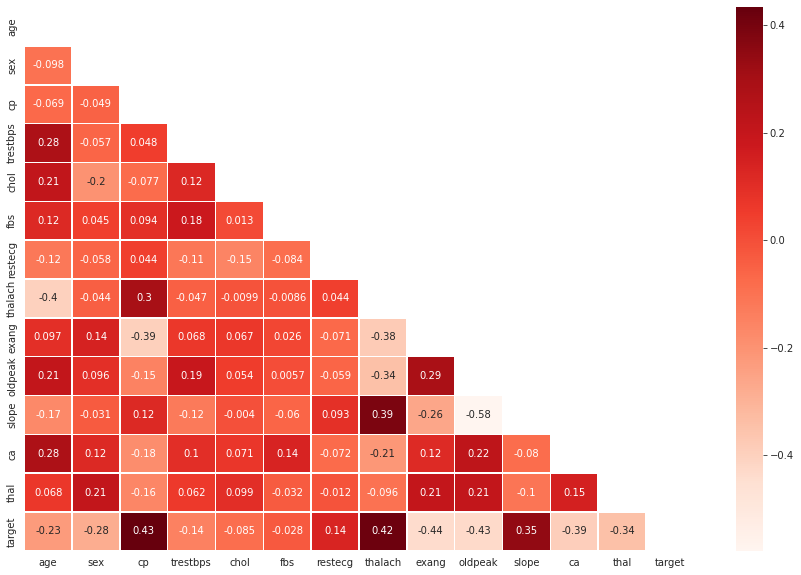

In [20]:
plt.subplots(figsize=(15,10))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask = mask, annot=True, linewidths = 0.5, cmap='Reds');

In [21]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
numerical_colms = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                   'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
                   
for col in numerical_colms:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Split data into train and test sets

In [24]:
x_data = df.iloc[:,:13]
y_data = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=5)

# Feature Scaling

In [25]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Machine Learning - Training Models
#### We are going to try 6 different machine learning models:
- LogisticRegression
- SVC
- KNeighborsClassifier
- RandomForestClassifier

In [26]:
models = {
    'LR'   : LogisticRegression(),
    'SVC'  : SVC(),
    'KNNC' : KNeighborsClassifier(),
    'RFC'  : RandomForestClassifier(),
}   

In [27]:
models_name = list(models.keys())
accuracy_values = list()

In [28]:
for name, model in models.items():
    print(f'Model name: {name}')
    model.fit(X_train, y_train)
    print(f'Train score : {model.score(X_train, y_train)}')
    print(f'Test score : {model.score(X_test, y_test)}')
    accuracy_values.append(model.score(X_test, y_test))
    print('-' * 30)

Model name: LR
Train score : 0.8223140495867769
Test score : 0.8852459016393442
------------------------------
Model name: SVC
Train score : 0.9090909090909091
Test score : 0.8524590163934426
------------------------------
Model name: KNNC
Train score : 0.8636363636363636
Test score : 0.8688524590163934
------------------------------
Model name: RFC
Train score : 1.0
Test score : 0.9016393442622951
------------------------------


# Hyperparameter tuning with RandomizedSearchCV
#### We are going to tune:
* LogisticRegression
* RandomForestClassifier
* SVC

In [29]:
lgr_grid = {"solver":['liblinear','lbfgs'],"C": np.logspace(-1,1,20)}

rs_lr = RandomizedSearchCV(LogisticRegression(), param_distributions=lgr_grid, cv=5, n_iter=20, verbose=True, n_jobs=-1)
rs_lr.fit(X_train, y_train)

print(rs_lr.best_params_)
print(rs_lr.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'solver': 'liblinear', 'C': 0.8858667904100825}
0.8852459016393442


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished


In [30]:
rf_grid = {'bootstrap': [True, False],
               'max_depth': [10,20,30,40,50, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': np.arange(2,20),
               'min_samples_split': np.arange(2,20),
               'n_estimators': np.arange(10,600,50)}

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5,  n_iter=20, verbose=True, n_jobs=-1)
rs_rf.fit(X_train, y_train)

print(rs_rf.best_params_)
print(rs_rf.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   40.7s finished


{'n_estimators': 560, 'min_samples_split': 6, 'min_samples_leaf': 15, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}
0.8852459016393442


In [31]:
rs_svc_grid = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

rs_svc = RandomizedSearchCV(SVC(), param_distributions=rs_svc_grid, cv=5, n_iter=20, verbose=True, n_jobs=-1)
rs_svc.fit(X_train, y_train)

print(rs_svc.best_params_)
print(rs_svc.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'kernel': 'sigmoid', 'gamma': 0.01, 'C': 1}
0.8852459016393442


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished


#PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(2)

In [35]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pca.transform(X_train)

array([[ 2.43058619e+00,  1.17329640e-01],
       [ 1.91453362e+00,  3.40467628e-01],
       [-8.56661923e-01,  2.03395339e+00],
       [-8.04612986e-03, -7.85303579e-01],
       [-1.71007984e+00,  2.75545225e-01],
       [ 2.95980469e+00, -1.75441194e+00],
       [-1.36226505e+00,  1.16919894e-01],
       [-2.22675078e+00, -1.04929630e+00],
       [ 2.02946931e+00, -2.00383896e+00],
       [ 8.39518640e-01,  8.26571153e-01],
       [ 7.45716167e-02, -6.75228010e-02],
       [-1.69417955e+00,  7.11090781e-01],
       [ 3.63184714e+00, -9.74550562e-01],
       [ 3.11629900e+00, -9.03365064e-01],
       [-2.64606750e+00, -1.44653713e+00],
       [ 2.34317959e+00,  2.10990016e+00],
       [-9.94885778e-02,  9.85693381e-01],
       [-1.28249243e+00,  6.84369771e-01],
       [-2.15434063e+00,  4.25207955e-01],
       [-1.29107279e+00,  3.34368211e-02],
       [-6.02991720e-01,  9.08911243e-01],
       [-1.65994266e+00, -3.80577403e-01],
       [-4.27905192e-01, -1.11743499e+00],
       [-7.

In [39]:
pca_df = pd.DataFrame(pca.transform(X_train), columns = ['PC1', 'PC2'])
pca_df['target'] = y_train

In [40]:
pca_df

,PC1,PC2,target
0,2.430586,0.117330,1.0
1,1.914534,0.340468,1.0
2,-0.856662,2.033953,1.0
3,-0.008046,-0.785304,1.0
4,-1.710080,0.275545,1.0
...,...,...,...
237,-0.838567,2.052471,0.0
238,-0.874054,-0.669155,NaN
239,-2.606354,-1.084985,0.0
240,-1.547586,-1.905873,0.0


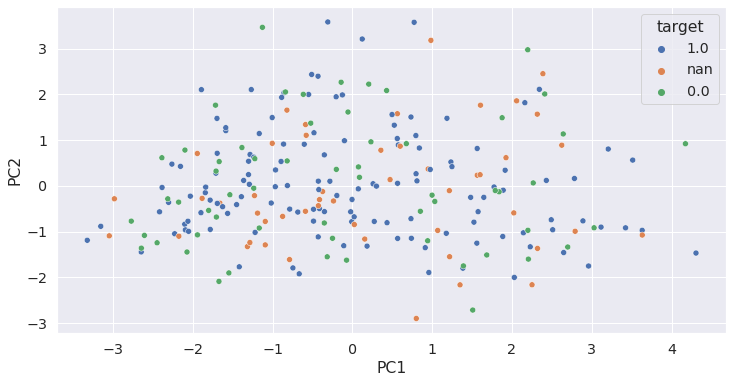

In [41]:
pca_df['target'] = pca_df['target'].astype('str')

plt.figure(figsize=(12,6))
sns.scatterplot(x='PC1', y='PC2', hue = 'target', data = pca_df)
plt.show()